# Rocket to the Moon

### Imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

In [58]:
from physics.orbits import pos_earth_moon, orbital_period, compute_L2, optimal_L2_orbit
from physics.dynamics import acceleration
from integrator import evolve
from plotting import plot_trajectories
from optimizer import optimize_delta_r

### Time Calculations

In [ ]:
T = orbital_period()
time_step = 100
max_time = 1*T 
time = np.arange(0, max_time, time_step)
print(np.shape(time))
print(f"Simulating for {max_time:.2f}  with time step {time_step:.7f} seconds.")
print(f"Number of steps: {len(time)}")

(2358,)
Simulating for 2357285.97  with time step 1000.0000000 seconds.
Number of steps: 2358


### Calculate L2

In [60]:
ratio = 1.0486155527864045
pos_L2, v_L2 = compute_L2(alpha = ratio)
r_L2 = optimal_L2_orbit(pos_L2, time)
print(np.shape(r_L2))

Optimal delta_r: 64520.112511047984 km
(2358, 3)


In [61]:
#error = optimize_delta_r(ratio)
#print(error)

### Calcuate Earth and Moons Position

In [62]:
r_earth_barycenter, r_moon_barycenter = pos_earth_moon(time)

### Calculate rockets position and velocity by solving the ODE

In [63]:
r_rocket_barycenter, v_rocket_barycenter = evolve(pos_L2, v_L2, time, EoM=acceleration, method='odeint')
r_rk4, v_rk4 = evolve(pos_L2, v_L2, time, EoM=acceleration, method='RK4')
#r_rk8, v_rk8 = evolve(pos_L2, v_L2, time, EoM=acceleration, method='RK8')
r_taylor, v_taylor = evolve(pos_L2, v_L2, time, EoM=acceleration, method='Taylor')

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


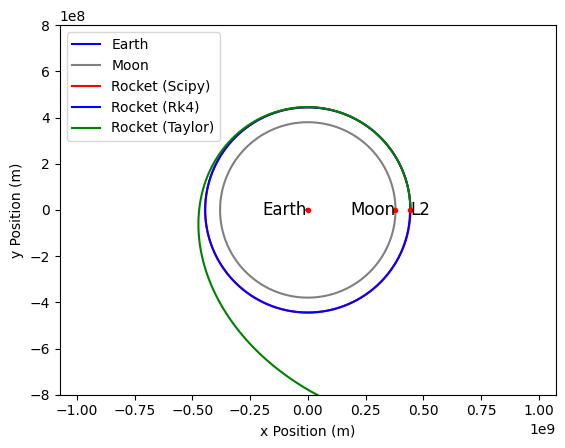

In [64]:
plt.plot(r_earth_barycenter[:,0], r_earth_barycenter[:,1], label='Earth', color='blue')
plt.plot(r_moon_barycenter[:,0], r_moon_barycenter[:,1], label='Moon', color='gray')
plt.plot(r_rocket_barycenter[:,0], r_rocket_barycenter[:,1], label='Rocket (Scipy)', color='red')
plt.plot(r_rk4[:,0], r_rk4[:,1], label='Rocket (Rk4)', color='blue')
#plt.plot(r_rk8[:,0], r_rk8[:,1], label='Rocket (Rk8)', color='purple')
plt.plot(r_taylor[:,0], r_taylor[:,1], label='Rocket (Taylor)', color='green')
#plt.plot(r_L2[:,0], r_L2[:,1], label='Optimal L2 Orbit', color='black', linestyle='--')

plt.plot(r_moon_barycenter[1,0], r_moon_barycenter[1,1], marker='o', color='red', markersize=3)  # Starting position of the moon
plt.plot(r_rocket_barycenter[1,0], r_rocket_barycenter[1,1], marker='o', color='red', markersize=3)
plt.plot(0, 0, marker='o', color='red', markersize=3)  # Starting position of the rocket

plt.text(r_earth_barycenter[0,0], r_earth_barycenter[0,1], 'Earth', color='black',fontsize=12,ha='right', va='center')
plt.text(r_moon_barycenter[0,0], r_moon_barycenter[0,1], 'Moon', color='black',fontsize=12,ha='right', va='center')
plt.text(r_rocket_barycenter[0,0], r_rocket_barycenter[0,1], 'L2', color='black',fontsize=12,ha='left', va='center')


plt.axis('equal')
plt.xlim(-8e8, 8e8)
plt.ylim(-8e8, 8e8)
plt.xlabel('x Position (m)')
plt.ylabel('y Position (m)')
plt.legend(loc='upper left')
plt.show()

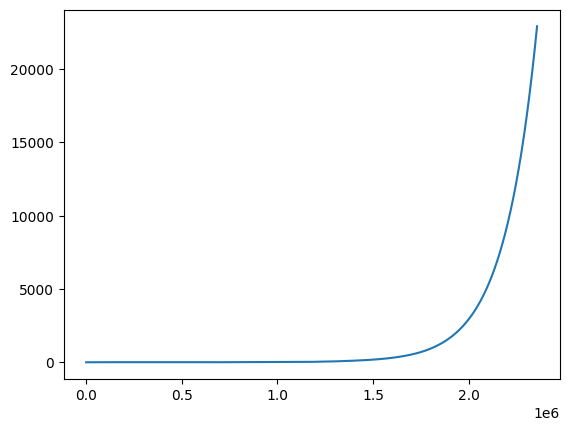

Global error: 4.408774e+03
Final distance from optimal orbit: 2.289672e+04


In [65]:
error = np.linalg.norm(r_rocket_barycenter - r_L2, axis=1)

global_error = np.sqrt(np.mean(error**2))
plt.plot(time, error)
plt.show()
#print(len(error),np.shape(r_rocket_barycenter))
print(f'Global error: {global_error:.6e}')
print(f'Final distance from optimal orbit: {error[-1]:.6e}')

In [66]:
lengths = np.linalg.norm(r_rocket_barycenter, axis=1)

std = np.std(lengths)
mean = np.mean(lengths)
#print(std, mean)
std_error = std/mean
print(f'std_error: {std_error:.6e}')

std_error: 7.749103e-06


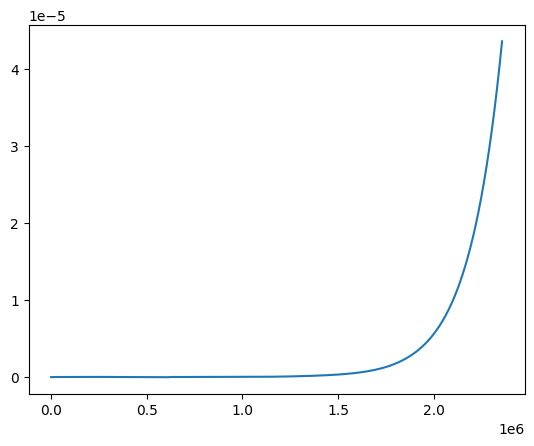

In [67]:
plt.plot(time, (lengths-lengths[0])/lengths[0], label='Normalized Length Variation')